In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/resources/data/iris-data.csv")

In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [5]:
df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

### therefore there are 5 values missing in petal width so we need to remove them or replace them

In [7]:
#df.fillna('99999', inplace=True)

In [8]:
#df.isnull().sum()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Next, let's create a scatterplot matrix. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

### We can even have the plotting package color each entry by its class to look for trends within the classes.

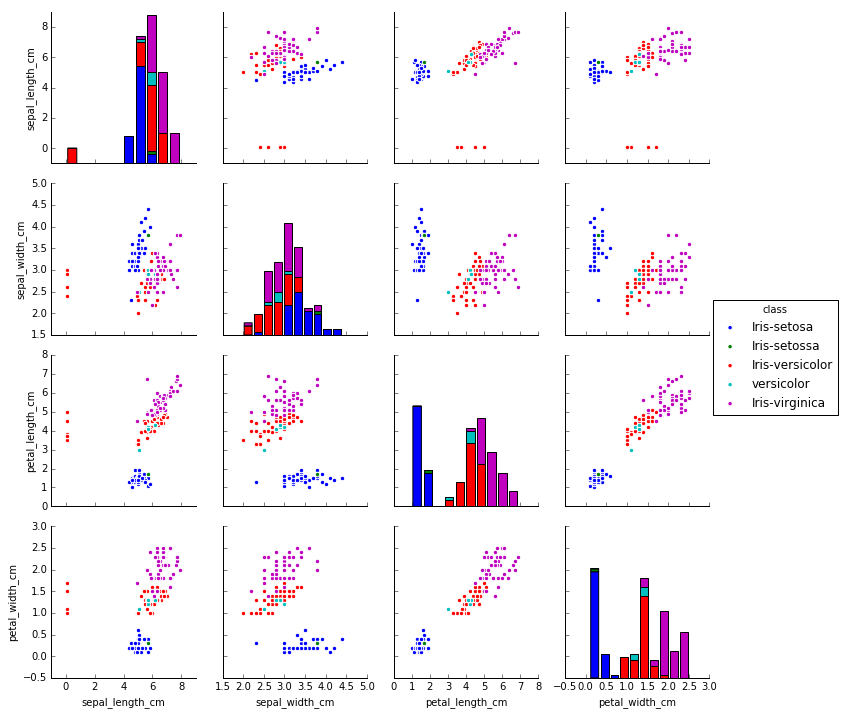

In [12]:
sns.pairplot(df.dropna(), hue='class')

### From above plots, there are five classes when there should only be three, meaning there were some coding errors.

In [13]:
df.loc[df['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
df.loc[df['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### now we have only 3 classes as required and now we will move further to remove errors for further analysis

### There are some clear outliers in the measurements that may be erroneous: one sepal_width_cm entry for Iris-setosa falls well outside its normal range, and several sepal_length_cm entries for Iris-versicolor are near-zero for some reason.

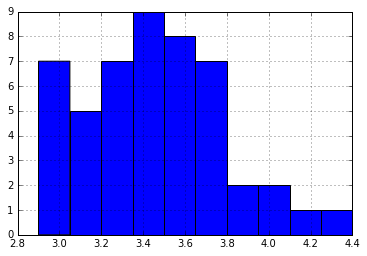

In [14]:

# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
df = df.loc[(df['class'] != 'Iris-setosa') | (df['sepal_width_cm'] >= 2.5)]
df.loc[df['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()


### The next data issue to address is the several near-zero sepal lengths for the Iris-versicolor rows. Let's take a look at those rows.

In [15]:
df.loc[(df['class'] == 'Iris-versicolor') &
              (df['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


### All of these near-zero sepal_length_cm entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters.

### After some brief correspondence with the field researchers, we find that one of them forgot to convert those measurements to centimeters. Let's do that for them.

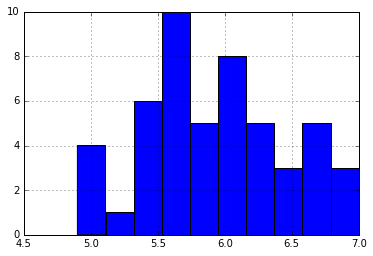

In [16]:
df.loc[(df['class'] == 'Iris-versicolor') &
              (df['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

df.loc[df['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()


### Good thing we fixed those outliers. They could've really thrown our analysis off.
### now We had to drop those rows with missing values.

In [17]:
df.loc[(df['sepal_length_cm'].isnull()) |
              (df['sepal_width_cm'].isnull()) |
              (df['petal_length_cm'].isnull()) |
              (df['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [18]:
df['sepal_length_cm'].isnull().sum()

0

In [19]:
df['sepal_width_cm'].isnull().sum()

0

In [20]:
df['petal_length_cm'].isnull().sum()

0

In [21]:
df['petal_width_cm'].isnull().sum()

5

### therefore only five values missing in petal_width column in class Iris-setosa

### It's not ideal that we had to drop those rows, especially considering they're all Iris-setosa entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same Iris type — this error could potentially bias our analysis.

### One way to deal with missing data is mean imputation

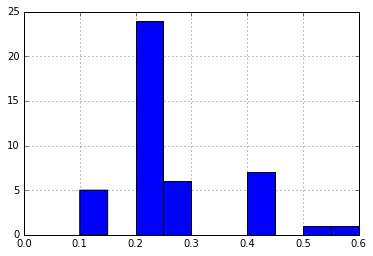

In [22]:
df.loc[df['class'] == 'Iris-setosa', 'petal_width_cm'].hist()


### Most of the petal widths for Iris-setosa fall within the 0.2-0.3 range, so let's fill in these entries with the average measured petal width.

In [23]:
average_petal_width = df.loc[df['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

df.loc[(df['class'] == 'Iris-setosa') &
              (df['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

In [24]:

df.loc[(df['class'] == 'Iris-setosa') &
              (df['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [25]:
df.loc[(df['sepal_length_cm'].isnull()) |
              (df['sepal_width_cm'].isnull()) |
              (df['petal_length_cm'].isnull()) |
              (df['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


### therefore all null values have treated for further data analysis

In [26]:
df.to_csv('df-clean.csv', index=False)

df_clean = pd.read_csv('df-clean.csv')

In [27]:
df_clean.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df_clean.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_length_cm    149 non-null float64
sepal_width_cm     149 non-null float64
petal_length_cm    149 non-null float64
petal_width_cm     149 non-null float64
class              149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [30]:
df_clean.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [31]:
df_clean.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732
std,0.799542,0.430104,1.758720,0.762191
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


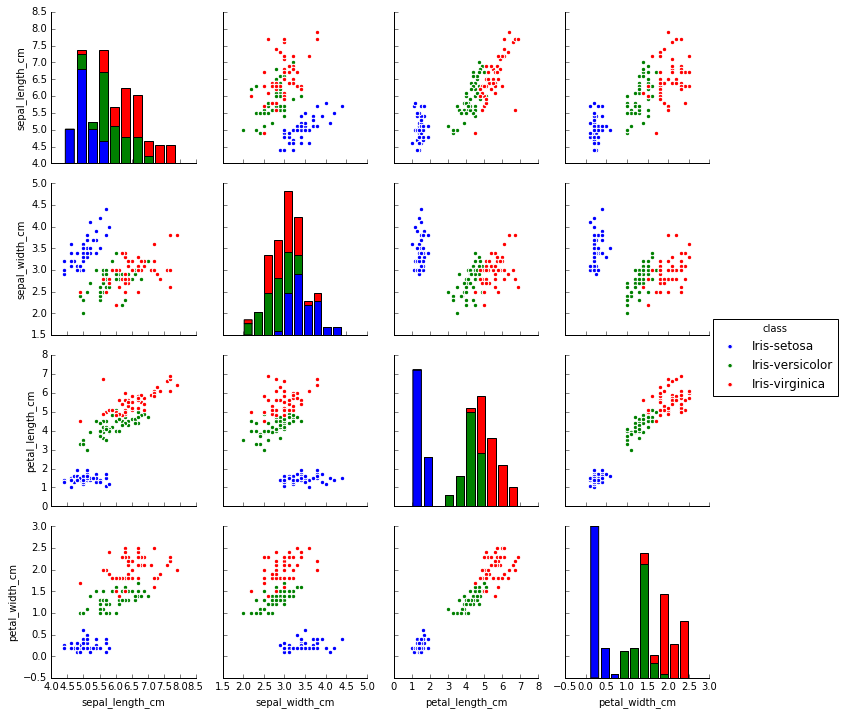

In [32]:
sns.pairplot(df_clean, hue='class')

### The general takeaways here should be:

### Make sure your data is encoded properly

### Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

### Deal with missing data in one way or another: replace it if you can or drop it

### Never tidy your data manually because that is not easily reproducible

### Use code as a record of how you tidied your data

### Plot everything you can about the data at this stage of the analysis so you can visually confirm everything looks correct

### We can quickly test our data using assert statements: We assert that something must be true, and if it is, then nothing happens and the notebook continues running. However, if our assertion is wrong, then the notebook stops running and brings it to our attention.
### Let's test a few things that we know about our data set now.



In [33]:
# We know that we should only have three classes
assert len(df_clean['class'].unique()) == 3

In [34]:

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert df_clean.loc[df_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

In [35]:
# We know that our data set should have no missing measurements
assert len(df_clean.loc[(df_clean['sepal_length_cm'].isnull()) |
                               (df_clean['sepal_width_cm'].isnull()) |
                               (df_clean['petal_length_cm'].isnull()) |
                               (df_clean['petal_width_cm'].isnull())]) == 0

###  And so on. If any of these expectations are violated, then our analysis immediately stops and we have to return to the tidying stage.

## Step 4: Exploratory analysis

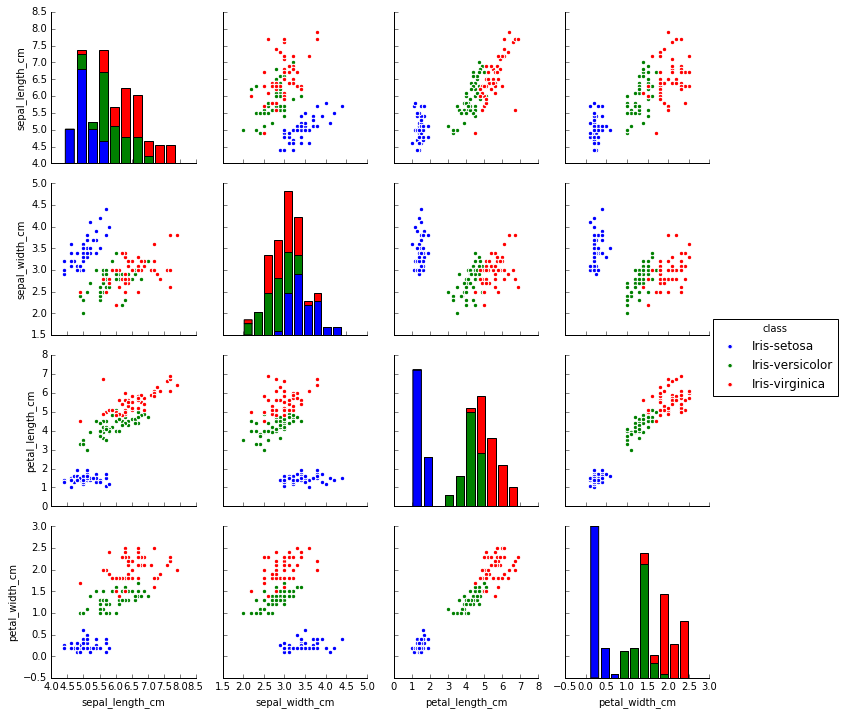

In [36]:
sns.pairplot(df_clean, hue='class')

### We can also make violin plots of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


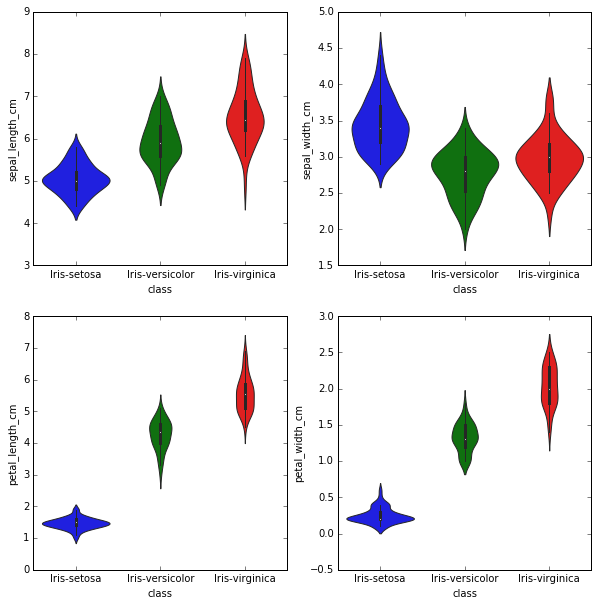

In [37]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=df_clean)

### Enough flirting with the data. Let's get to modeling.

## Step 5: Classification

In [72]:
features = df_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

In [73]:
labels = df_clean['class'].values

In [74]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [77]:
labels[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### let's split data into training and testing sets

In [78]:
from sklearn.model_selection import train_test_split

In [87]:
training_inputs,testing_inputs,training_classes,testing_classes=train_test_split(features, labels, test_size=0.25, random_state=1)

### now lets fit the model after splitting 

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
model = DecisionTreeClassifier()

In [90]:
model.fit(training_inputs, training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
accuracy=model.score(testing_inputs, testing_classes)
accuracy

0.9736842105263158

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.47368421, 0.57368421, 0.67368421, 0.77368421, 0.87368421,
        0.97368421, 1.07368421, 1.17368421, 1.27368421, 1.37368421,
        1.47368421]),
 <a list of 10 Patch objects>)

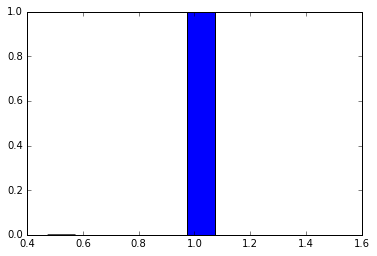

In [97]:
plt.hist(accuracy)

In [93]:
model_accuracies= []

In [94]:
for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(features, labels, test_size=0.25)
    
    clf = DecisionTreeClassifier()
    clf.fit(training_inputs, training_classes)
    classifier_accuracy = clf.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

(array([  5.,  22.,   0.,  94.,   0., 204., 330.,   0., 243., 102.]),
 array([0.84210526, 0.85789474, 0.87368421, 0.88947368, 0.90526316,
        0.92105263, 0.93684211, 0.95263158, 0.96842105, 0.98421053,
        1.        ]),
 <a list of 10 Patch objects>)

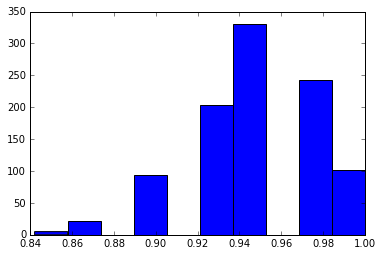

In [98]:
plt.hist(model_accuracies)

### It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as overfitting: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.
### This problem is the main reason that most data scientists perform k-fold cross-validation on their models: Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once.

### 10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:

In [99]:

import numpy as np
from sklearn.model_selection import StratifiedKFold

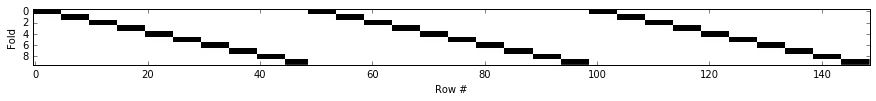

In [100]:
def plot_cv(cv, features1, labels1):
    masks = []
    for train, test in cv.split(features1, labels1):
        mask = np.zeros(len(labels1), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), features, labels)

### lets perform 10-fold cross-validation on our model 

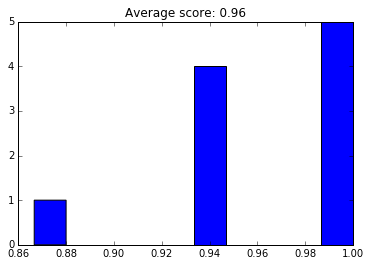

In [103]:
from sklearn.model_selection import cross_val_score

clf1 = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(clf1, features, labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

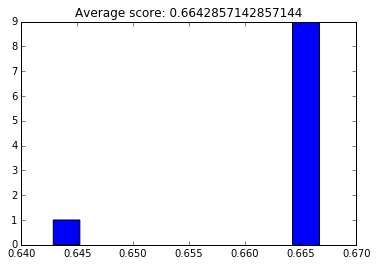

In [116]:
clf1 = DecisionTreeClassifier(max_depth=1)

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(clf1, features, labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### the classification accuracy falls tremendously.

### Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

### The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

In [112]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(features, labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9664429530201343
Best parameters: {'max_features': 2, 'max_depth': 4}


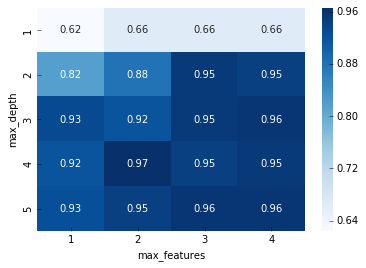

In [117]:

grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

### Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [118]:

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(features, labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.959731543624161
Best parameters: {'max_features': 2, 'splitter': 'best', 'max_depth': 3, 'criterion': 'gini'}


### Now we can take the best classifier from the Grid Search and use that:

In [119]:

decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### We can even visualize the decision tree with GraphViz to see how it's making the classifications:

In [121]:

import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
out_file

### We finally have our demo classifier. Let's create some visuals of its performance so we have something to show our company's Head of Data.

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


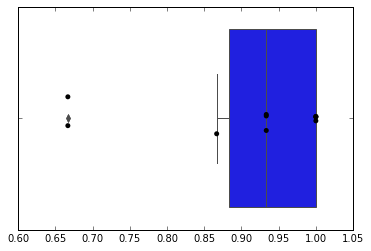

In [122]:
dt_scores = cross_val_score(decision_tree_classifier, features, labels, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black')

### Random Forest classifiers usually work better than individual decision trees. A common problem that decision trees face is that they're prone to overfitting: They complexify to the point that they classify the training set near-perfectly, but fail to generalize to data they have not seen before.

### Random Forest classifiers work around that limitation by creating a whole bunch of decision trees (hence "forest") — each trained on random subsets of training samples (drawn with replacement) and features (drawn without replacement) — and have the decision trees work together to make a more accurate classification.

### The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is the same for all models, so we only need to plug in the new classifier.

In [123]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(features, labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9664429530201343
Best parameters: {'max_features': 2, 'n_estimators': 100, 'criterion': 'gini'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Now we can compare their performance:

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


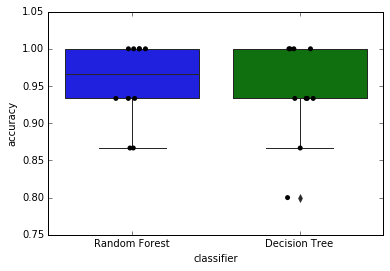

In [127]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, features, labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, features, labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sns.boxplot(x='classifier', y='accuracy', data=both_df)
sns.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')

### hey both seem to perform about the same on this data set. This is probably because of the limitations of our data set: We have only 4 features to make the classification, and Random Forest classifiers excel when there's hundreds of possible features to look at.

## Step 6: Reproducibility

### lets see some predictions using random forest classifier

In [128]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features, labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
for input_features, prediction, actual in zip(testing_inputs[:20],
                                              random_forest_classifier.predict(testing_inputs[:20]),
                                              testing_classes[:20]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

[4.4  2.9  1.4  0.25]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.1 3.7 1.5 0.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.5 4.2 1.4 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.  2.  3.5 1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.2 2.2 4.5 1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.9 3.1 5.4 2.1]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.7 2.5 5.8 1.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[7.  3.2 4.7 1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.5 3.2 5.1 2. ]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.7 3.  5.  1.7]	-->	Iris-virginica	(Actual: Iris-versicolor)
[7.9 3.8 6.4 2. ]	-->	Iris-virginica	(Actual: Iris-virginica)
[4.8 3.4 1.9 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[7.7 3.  6.1 2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.2 4.1 1.5 0.1]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.4 3.9 1.7 0.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.7 3.  4.2 1.2]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.6 2.5 3.9 1.1]	-->	Iris-vers

## Thus our model is good enough for prddictions with accuracy greater than 95%